In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('data_arrhythmia.csv', delimiter = ';',na_values = ['?'])

In [74]:
df

age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
0     75    0     190      80            91           193           371   
1     56    1     165      64            81           174           401   
2     54    0     172      95           138           163           386   
3     55    0     175      94           100           202           380   
4     75    0     190      80            88           181           360   
..   ...  ...     ...     ...           ...           ...           ...   
447   53    1     160      70            80           199           382   
448   37    0     190      85           100           137           361   
449   36    0     166      68           108           176           365   
450   32    1     155      55            93           106           386   
451   78    1     160      70            79           127           364   

     t_interval  p_interval  qrs  ...   KY    KZ    LA   LB  LC   LD   LE  \
0           174         121  -16  ...  0.0   9.0  -0.9  0.0   0  0.9  2.9   
1           149          39   25  ...  0.0   8.5   0.0  0.0   0  0.2  2.1   
2           185         102   96  ...  0.0   9.5  -2.4  0.0   0  0.3  3.4   
3           179         143   28  ...  0.0  12.2  -2.2  0.0   0  0.4  2.6   
4           177         103  -16  ...  0.0  13.1  -3.6  0.0   0 -0.1  3.9   
..          ...         ...  ...  ...  ...   ...   ...  ...  ..  ...  ...   
447         154         117  -37  ...  0.0   4.3  -5.0  0.0   0  0.7  0.6   
448         201          73   86  ...  0.0  15.6  -1.6  0.0   0  0.4  2.4   
449         194         116  -85  ...  0.0  16.3 -28.6  0.0   0  1.5  1.0   
450         218          63   54  ... -0.4  12.0  -0.7  0.0   0  0.5  2.4   
451         138          78   28  ...  0.0  10.4  -1.8  0.0   0  0.5  1.6   

       LF    LG  diagnosis  
0    23.3  49.4          8  
1    20.4  38.8          6  
2    12.3  49.0         10  
3    34.6  61.6          1  
4    25.4  62.8          7  
..    ...   ...        ...  
447  -4.4  -0.5          1  
448  38.0  62.4         10  
449 -44.2 -33.2          2  
450  25.0  46.6          1  
451  21.3  32.8          1  

[452 rows x 280 columns]

value_counts() function returns object containing counts of unique values.

In [75]:
df.diagnosis.value_counts()

1     245
10     50
2      44
6      25
16     22
3      15
4      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

#check how many occurences of non-normal arrythmia exists

In [76]:
sum(df['diagnosis']!=1)

207

There are 245 occurences of normal arrythmia and 207 occurences of non-normal arrythmia. As only patients with non-normal arrythmia are subjected to further examination (they are in risk of heart failure) it doesn't make sense to predict what class of arrythmia the patient has.  

In [77]:
df1 = df.copy() #create a copy of the original dataset

#setting prediction values to "Normal" or "Risk" based on column scores values
df1.loc[df1["diagnosis"] == 1,"diagnosis"] = "Normal"         #class 1 is normal arrythmia
df1.loc[df1["diagnosis"] != "Normal","diagnosis"] = "Risk"    #other classes are risk classes
df1.diagnosis.value_counts()

Normal    245
Risk      207
Name: diagnosis, dtype: int64

Checking features to see if there are any uncomon values:

Histogram for age:


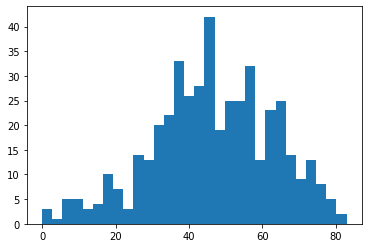

Histogram for sex:


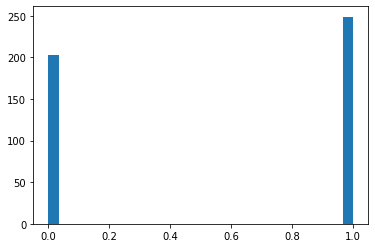

Histogram for height:


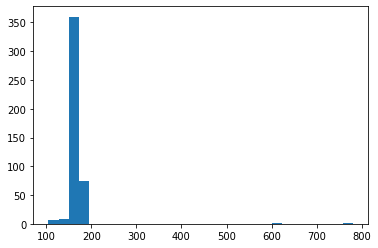

Histogram for weight:


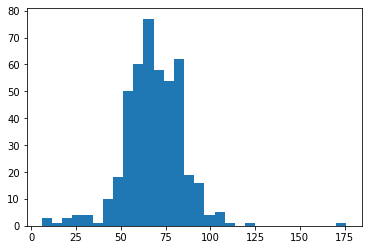

Histogram for heart_rate:


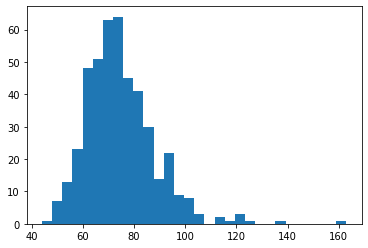

In [78]:
familiar_features = ['age','sex','height','weight','heart_rate'] #list of well known features with missing data

#function that creates an histogram for a feature
def print_hist(df,feature,nbins):
    print("Histogram for " + feature + ":")
    column = df[feature]
    plt.hist(column,bins=nbins)
    plt.show()

for feature in familiar_features: print_hist(df1,feature,30)

In [79]:
df1['age'].value_counts().sort_index() #get different values and count occurences for each value

0     1
1     2
3     1
7     3
8     2
     ..
78    2
79    1
80    2
81    1
83    1
Name: age, Length: 77, dtype: int64

In [80]:
df1[df1['age']==0] #select occurence with Age=0

age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
316    0    0     608      10            83           126           232   

     t_interval  p_interval  qrs  ...   KY   KZ   LA   LB  LC   LD   LE    LF  \
316         128          60  125  ... -0.7  4.5 -5.5  0.0   0  0.5  2.5 -11.8   

      LG  diagnosis  
316  1.7       Risk  

[1 rows x 280 columns]

The presence of an individual with Age = 0 and Weight = 10 kgs suggests that height = 608 cm is actually 61 cm. correcting height for this instance:

In [81]:
df1.loc[df1["age"] == 0, "height"] = 61

In [82]:
df1[df1['age']==0]

age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
316    0    0      61      10            83           126           232   

     t_interval  p_interval  qrs  ...   KY   KZ   LA   LB  LC   LD   LE    LF  \
316         128          60  125  ... -0.7  4.5 -5.5  0.0   0  0.5  2.5 -11.8   

      LG  diagnosis  
316  1.7       Risk  

[1 rows x 280 columns]

Height has been corrected for that instance.

In [83]:
df1['height'].value_counts().sort_index()

61      1
105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     3
780     1
Name: height, dtype: int64

In [84]:
df1[df1['height']==780] #select occurence with Height=780

age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
141    1    1     780       6            85           165           237   

     t_interval  p_interval  qrs  ...   KY   KZ   LA   LB  LC   LD   LE   LF  \
141         150         106   88  ...  0.0  5.0 -4.6  0.0   0  1.3  0.7  2.7   

      LG  diagnosis  
141  5.5       Risk  

[1 rows x 280 columns]

The presence of another baby with incorrect height (780 cm) suggests another typo to correct:

In [85]:
df1.loc[df1["height"] == 780, "height"] = 78

In [86]:
df1[df1['height']==78]

age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
141    1    1      78       6            85           165           237   

     t_interval  p_interval  qrs  ...   KY   KZ   LA   LB  LC   LD   LE   LF  \
141         150         106   88  ...  0.0  5.0 -4.6  0.0   0  1.3  0.7  2.7   

      LG  diagnosis  
141  5.5       Risk  

[1 rows x 280 columns]

Height has been corrected for that instance.

Looking for features with one-level cardinality (non-informative features):

In [87]:
one_levels = [] #create an empty list to append features with one level

ncol = df1.shape[1] # store number of columns

#for loop to add features names with one level to "one_levels" list 

for index in range(ncol):
    if len(df1.iloc[:,index].unique()) == 1:
        one_levels.append(df1.columns[index])

one_levels

["S'_wave",
 'CB',
 'CD',
 'CS',
 'EV',
 'EY',
 'FF',
 'FH',
 'FJ',
 'FL',
 'FS',
 'FZ',
 'GA',
 'GH',
 'IB',
 'KP',
 'LC']

All those features have only one level and therefore should be eliminated once they don't add knowledge to the dataset.

In [88]:
df2 = df1.copy()
df2 = df1.drop(columns=one_levels) # delete one_level columns 

Checking for missing values:

In [89]:
df2.isnull().sum().sum() #total number of missing values is 408

408

In [90]:
#print columns with missing values and its occurences
missing = df2.isnull().sum()
missing_df = pd.DataFrame(missing)
missing_df[missing_df[0]!=0]

0
T             8
P            22
QRST          1
J           376
heart_rate    1

From the output above, there are few features with missing values. Feature J has 376 missing values. This represents 83% of the occurences in the dataset and for that reason we will delete this feature from the dataset. The reason behind this is the rule of removing features with more than 60% of missing data as it leads to less accurate results.

In [91]:
df3 = df2.copy()
df3 = df3.drop(columns=['J'])
df3

age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
0     75    0     190      80            91           193           371   
1     56    1     165      64            81           174           401   
2     54    0     172      95           138           163           386   
3     55    0     175      94           100           202           380   
4     75    0     190      80            88           181           360   
..   ...  ...     ...     ...           ...           ...           ...   
447   53    1     160      70            80           199           382   
448   37    0     190      85           100           137           361   
449   36    0     166      68           108           176           365   
450   32    1     155      55            93           106           386   
451   78    1     160      70            79           127           364   

     t_interval  p_interval  qrs  ...   KV   KY    KZ    LA   LB   LD   LE  \
0           174         121  -16  ... -0.3  0.0   9.0  -0.9  0.0  0.9  2.9   
1           149          39   25  ... -0.5  0.0   8.5   0.0  0.0  0.2  2.1   
2           185         102   96  ...  0.9  0.0   9.5  -2.4  0.0  0.3  3.4   
3           179         143   28  ...  0.1  0.0  12.2  -2.2  0.0  0.4  2.6   
4           177         103  -16  ... -0.4  0.0  13.1  -3.6  0.0 -0.1  3.9   
..          ...         ...  ...  ...  ...  ...   ...   ...  ...  ...  ...   
447         154         117  -37  ...  0.0  0.0   4.3  -5.0  0.0  0.7  0.6   
448         201          73   86  ... -0.5  0.0  15.6  -1.6  0.0  0.4  2.4   
449         194         116  -85  ...  1.2  0.0  16.3 -28.6  0.0  1.5  1.0   
450         218          63   54  ...  0.2 -0.4  12.0  -0.7  0.0  0.5  2.4   
451         138          78   28  ... -0.3  0.0  10.4  -1.8  0.0  0.5  1.6   

       LF    LG  diagnosis  
0    23.3  49.4       Risk  
1    20.4  38.8       Risk  
2    12.3  49.0       Risk  
3    34.6  61.6     Normal  
4    25.4  62.8       Risk  
..    ...   ...        ...  
447  -4.4  -0.5     Normal  
448  38.0  62.4       Risk  
449 -44.2 -33.2       Risk  
450  25.0  46.6     Normal  
451  21.3  32.8     Normal  

[452 rows x 262 columns]

Handling missing values: for the remaining features with missing values we will assign mean or median values depending on histogram distribution.

Histogram for P:


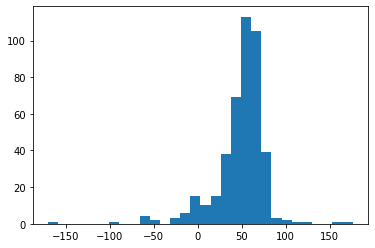

Histogram for T:


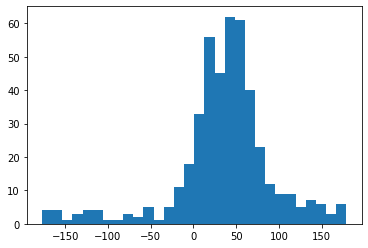

Histogram for QRST:


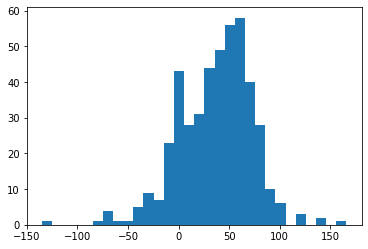

Histogram for heart_rate:


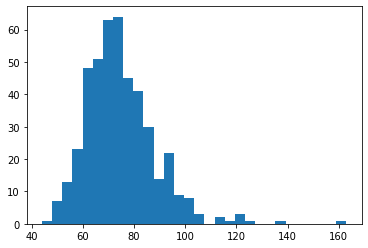

In [92]:
missing_features = ['P','T','QRST','heart_rate'] #list pf features with missing data

for feature in missing_features: print_hist(df3,feature,30)

All histograms seem to be unfair and biased so we will assign median values using sci-kit library "impute".

In [93]:
from sklearn.impute import SimpleImputer

df4 = df3.copy() #create a new copy of the dataset
X_df = df4.loc[:,df4.columns != 'diagnosis'] #select all features except target feature
X = np.array(X_df) #convert it to array (Simple Imputer doesn't work with dataframes)
imp = SimpleImputer(missing_values=np.nan, strategy='median') #create imp object to impute median in all missing values 
imp = imp.fit(X) #calculate median values of the features with missing values
X_imp = imp.transform(X) #fill dataset with median values wherever finds missing values

Check if there are any missing values:

In [94]:
np.isnan(X_imp).sum().sum() #total number of missing values in the dataset

0

In [95]:
df4.to_csv("cleandata.csv",index=False)

Hence we have removed missing and incorrect values and successfully cleansed the data for first prediction.

There are 16 classes as follows

Normal
1. Ischemic changes (Coronary Artery Disease
2. Old Anterior Myocardial Infarction
3. Old Inferior Myocardial Infarction
4. Sinus tachycardy
5. Sinus bradycardy
6. Ventricular Premature Contraction (PVC)
7. Supraventricular Premature Contraction
8. Left bundle branch block
9. Right bundle branch block
10. degree AtrioVentricular block
11. degree AV block
12. degree AV block
13. Left ventricule hypertrophy
14. Atrial Fibrillation or Flutter
15. Others
However only first one is a normal kind of arrythmia where the other classes can be superclassed as risky arrythmia cases all cases are classified as either normal or risky. Risky being the positive (True) case and normal being the negative (False) case, diagnosis column is changed.

In [96]:
from sklearn.model_selection import train_test_split

y = df4.iloc[:,-1] #subset target label

# splitting train and test data with same seed (random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.3, random_state=1) #70%/30% splitting

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(316, 261)
(136, 261)
(316,)
(136,)


In [97]:
print('Normal instances in test set: ' + str(sum(y_test=="Normal")))
print('Risk instances in test set: ' + str(sum(y_test=="Risk"))) 

Normal instances in test set: 73
Risk instances in test set: 63


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [99]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = X_train_scaled
X_test = X_test_scaled

In [100]:
model_names = ["Logistic Regression",
               "K-Nearest Neighbors",
               "Decision Tree Classifier",
               "Random Forest Classifier",
               "Gaussian Naive Bayes"]

models = []
predictions = []
pred_probabilities = []

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix

In [102]:
log_model = LogisticRegression(random_state=0,solver = "saga")
models.append(log_model)
log_model.fit(X_train, y_train)
log_predprob = log_model.predict_proba(X_test)
pred_probabilities.append(log_predprob)
log_pred = log_model.predict(X_test)
predictions.append(log_pred)

c:\users\ganesh\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [103]:
knn_model = KNeighborsClassifier(n_neighbors=80)
models.append(knn_model)
knn_model.fit(X_train, y_train)
knn_predprob = knn_model.predict_proba(X_test)
pred_probabilities.append(knn_predprob)
knn_pred = knn_model.predict(X_test)
predictions.append(knn_pred)

In [104]:
tree_model = DecisionTreeClassifier(random_state=0,max_depth = 8,max_features="auto")
models.append(tree_model)
tree_model.fit(X_train, y_train)
tree_predprob = tree_model.predict_proba(X_test)
pred_probabilities.append(tree_predprob)
tree_pred = tree_model.predict(X_test)
predictions.append(tree_pred)

In [105]:
rndfor_model = RandomForestClassifier(max_depth=9, random_state=0,n_estimators = 100)
models.append(rndfor_model)
rndfor_model.fit(X_train, y_train)
rndfor_predprob = rndfor_model.predict_proba(X_test)
pred_probabilities.append(rndfor_predprob)
rndfor_pred = rndfor_model.predict(X_test)
predictions.append(rndfor_pred)

In [106]:
nb_model = GaussianNB(var_smoothing = 0.00001)
models.append(nb_model)
nb_model.fit(X_train, y_train)
nb_predprob = nb_model.predict_proba(X_test)
pred_probabilities.append(nb_predprob)
nb_pred = nb_model.predict(X_test)
predictions.append(nb_pred)
nb_predprob.shape

(136, 2)

In [107]:
for name,pred in zip(model_names,predictions):
    print(name,"Accuracy:",round(accuracy_score(y_test,pred) * 100 , 2),"%")

Logistic Regression Accuracy: 77.94 %
K-Nearest Neighbors Accuracy: 54.41 %
Decision Tree Classifier Accuracy: 63.24 %
Random Forest Classifier Accuracy: 78.68 %
Gaussian Naive Bayes Accuracy: 72.79 %


Predicting Using Random Forest 

In [108]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)  

In [109]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [110]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)
y_pred

array(['Risk', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Risk', 'Normal', 'Normal', 'Normal', 'Risk',
       'Normal', 'Risk', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Risk', 'Normal', 'Normal', 'Risk', 'Risk', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Risk', 'Risk', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Risk', 'Risk', 'Risk',
       'Normal', 'Normal', 'Normal', 'Normal', 'Risk', 'Risk', 'Risk',
       'Risk', 'Risk', 'Normal', 'Normal', 'Normal', 'Risk', 'Risk',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Risk', 'Risk',
       'Risk', 'Normal', 'Risk', 'Risk', 'Normal', 'Risk', 'Risk',
       'Normal', 'Risk', 'Normal', 'Risk', 'Risk', 'Risk', 'Normal',
       'Risk', 'Risk', 'Normal', 'Normal', 'Risk', 'Normal', 'Normal',
       'Normal', 'Risk', 'Risk', 'Risk', 'Normal', 'Normal', 'Normal',
    

In [111]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
print(confusion_matrix(y_test, y_pred)) 

[[64  9]
 [23 40]]
